<a href="https://colab.research.google.com/github/MohiniRathore20/Aiml-Lab--Mohini-rathore/blob/main/Aiml%20exp%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing # Importing fetch_california_housing instead of load_boston

# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target  # Add target variable, keeping the same column name for consistency

# Display basic information
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.6394

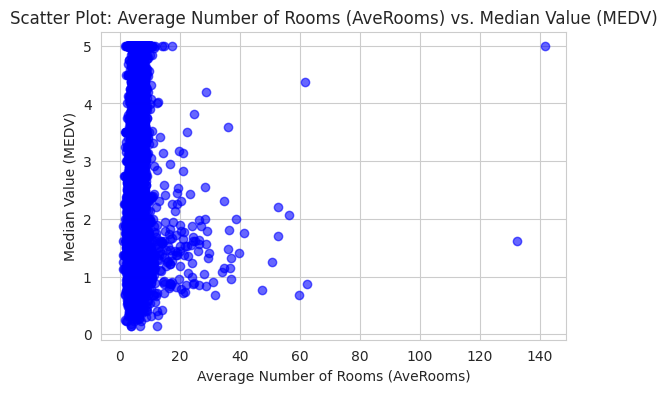

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for a single feature vs. target variable
plt.figure(figsize=(6, 4))
# Use 'AveRooms' instead of 'RM' to access the average number of rooms
plt.scatter(df['AveRooms'], df['MEDV'], alpha=0.6, color='blue')
plt.title('Scatter Plot: Average Number of Rooms (AveRooms) vs. Median Value (MEDV)')
plt.xlabel('Average Number of Rooms (AveRooms)')
plt.ylabel('Median Value (MEDV)')
plt.show()

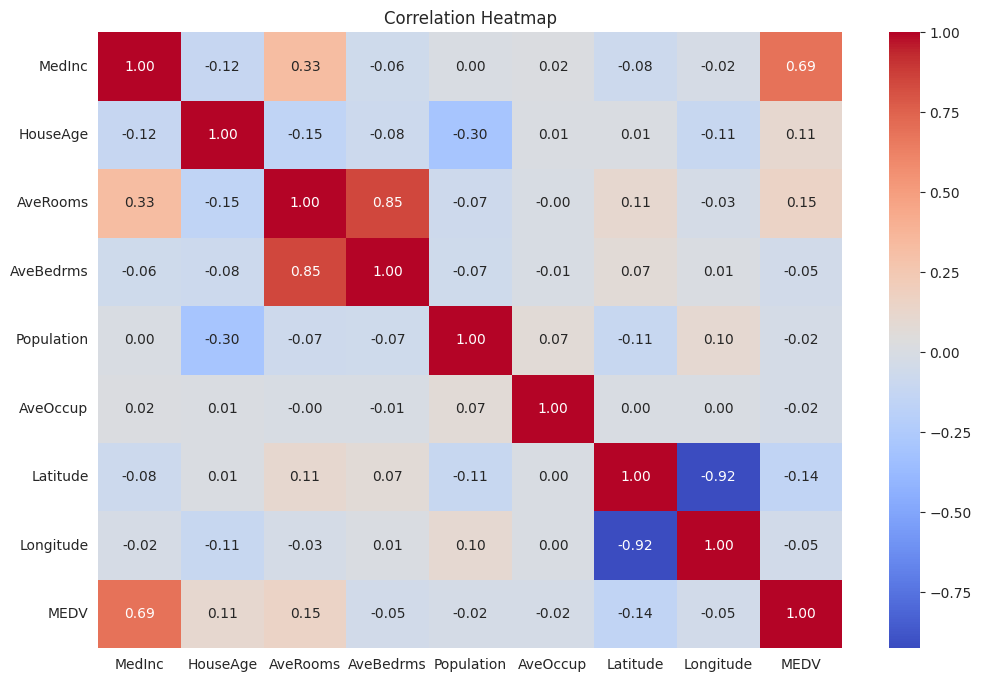

In [ ]:
# Heatmap to display correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
# Use 'AveRooms' instead of 'RM' (which is not a column in the California Housing dataset)
X = df[['AveRooms']]  # Single feature for simplicity
y = df['MEDV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 0.89
Mean Squared Error (MSE): 1.29
R-squared (R2): 0.01


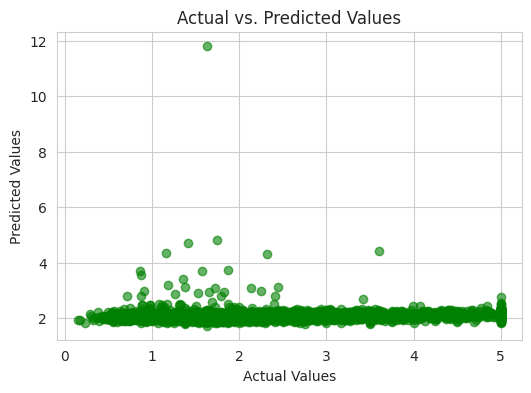

In [ ]:
# Scatter plot of actual vs. predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


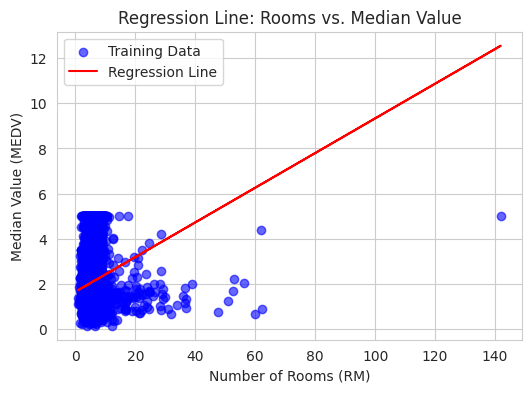

In [ ]:
# Regression line for training data
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, alpha=0.6, label='Training Data', color='blue')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.title('Regression Line: Rooms vs. Median Value')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median Value (MEDV)')
plt.legend()
plt.show()
